In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import string
import seaborn as sns


import sklearn.preprocessing as preprocessing
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline


In [3]:
filename = 'cancer.csv'
folder = './data'
filepath = f'{folder}/{filename}'
data = pd.read_csv(filepath)
data = data.loc[:, 'diagnosis':'fractal_dimension_worst']
data['diagnosis'] = data['diagnosis'].map(lambda x: {'M':1, 'B':0}[x])
data = data.dropna()

In [4]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
train_X, test_X, train_y, test_y = train_test_split(data.loc[:,'radius_mean':],data['diagnosis'])

In [26]:
pipeline = Pipeline([
    ('clf', GaussianNB())
])

In [27]:
pipeline.fit(train_X, train_y)

Pipeline(memory=None, steps=[('clf', GaussianNB(priors=None))])

In [28]:
predictions = pipeline.predict(test_X)

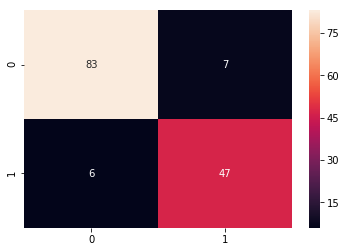

In [29]:
sns.heatmap(confusion_matrix(test_y, predictions), annot=True)

In [30]:
print(f1_score(test_y, predictions))

0.878504672897


In [31]:
pipeline1 = Pipeline([
    ('scaler', preprocessing.MinMaxScaler()),
    ('clf', LogisticRegression())
])

In [32]:
pipeline1.fit(train_X, train_y)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [33]:
predictions1 = pipeline1.predict(test_X)

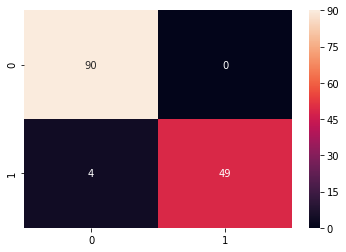

In [21]:
sns.heatmap(confusion_matrix(test_y, predictions1), annot=True)

In [22]:
print(f1_score(test_y, predictions1))

0.960784313725


In [23]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
worst1 = np.log(1 + data.loc[data['diagnosis'] == 1, 'concavity_worst'])
worst0 = np.log(1 + data.loc[data['diagnosis'] == 0, 'concavity_worst'])

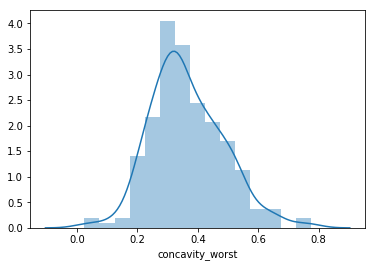

In [47]:
sns.distplot(worst1)

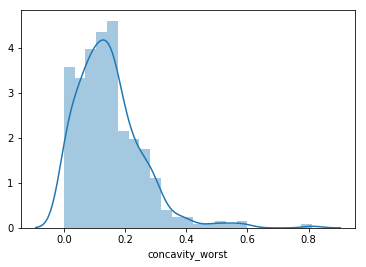

In [48]:
sns.distplot(worst0)

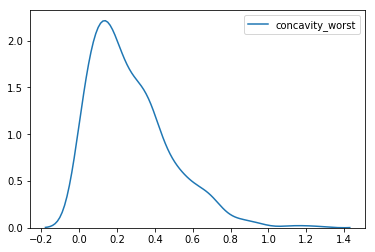

In [25]:
sns.kdeplot(worst)

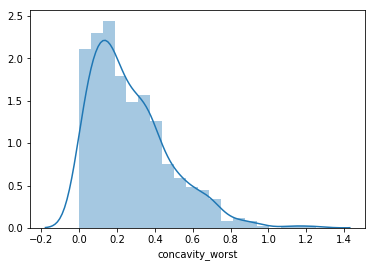

In [80]:
sns.distplot(worst)

In [81]:
predictions = pipeline.predict_proba(test_X)

In [83]:
import sklearn.metrics as metrics

In [85]:
metrics.roc_auc_score(test_y, predictions[:,1])

0.98439450686641705